# Kaggle案例泰坦尼克号问题

大家都熟悉的『Jack and Rose』的故事，豪华游艇倒了，大家都惊恐逃生，可是救生艇的数量有限，无法人人都有，副船长发话了『lady and kid first！』，
训练和测试数据是一些乘客的个人信息以及存活状况，要尝试根据它生成合适的模型并预测其他人的存活状况。
对，这是一个二分类问题，很多分类算法都可以解决。

还是用pandas加载数据

In [1]:
import pandas as pd
import numpy as np

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #中文显示问题

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

**<font color=red>我们看大概有以下这些字段</font>**<br>
PassengerId => 乘客ID<br>
Pclass => 乘客等级(1/2/3等舱位)<br>
Name => 乘客姓名<br>
Sex => 性别<br>
Age => 年龄<br>
SibSp => 堂兄弟/妹个数<br>
Parch => 父母与小孩个数<br>
Ticket => 船票信息<br>
Fare => 票价<br>
Cabin => 客舱<br>
Embarked => 登船港口

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<font color=red>上面的数据说啥了？它告诉我们，训练数据中总共有891名乘客，但是很不幸，我们有些属性的数据不全，比如说：<font><br>

* <font color=red>Age（年龄）属性只有714名乘客有记录<font>
* <font color=red>Cabin（客舱）更是只有204名乘客是已知的<font>

<font color=red>似乎信息略少啊，想再瞄一眼具体数据数值情况呢？恩，我们用下列的方法，得到数值型数据的一些分布(因为有些属性，比如姓名，是文本型；而另外一些属性，比如登船港口，是类目型。这些我们用下面的函数是看不到的)<font>

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 数据探索

<font color=red>看看**每个/多个 属性和最后的Survived**之间有着什么样的关系<font>

In [6]:
data.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

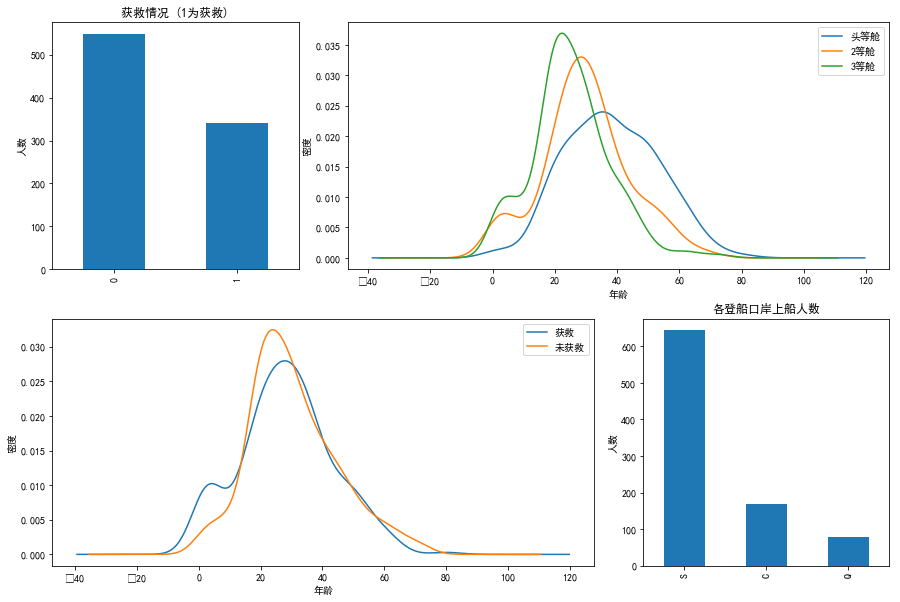

In [7]:
#座位等级越高，生存越多
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"获救情况 (1为获救)") # puts a title on our graph
plt.ylabel(u"人数")  

plt.subplot2grid((2,3),(0,1),colspan=2)             # 在一张大图里分列几个小图
data.Age[data['Pclass']==1].plot(kind='kde')
data.Age[data['Pclass']==2].plot(kind='kde')
data.Age[data['Pclass']==3].plot(kind='kde')
plt.xlabel(u"年龄")
plt.ylabel(u"密度")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best')

plt.subplot2grid((2,3),(1,0),colspan=2)  
data.Age[data['Survived']==1].plot(kind='kde')
data.Age[data['Survived']==0].plot(kind='kde')
              
plt.xlabel(u"年龄")
plt.ylabel(u"密度")
plt.legend((u'获救', u'未获救'),loc='best')

plt.subplot2grid((2,3),(1,2))
data.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  

plt.show()

* <font color=red>被救的人300多点，不到半数；<font><br>
* <font color=red>3个不同的舱年龄总体趋势似乎也一致，2/3等舱乘客20岁多点的人最多，1等舱40岁左右的最多(似乎符合财富和年龄的分配)；<font><br>
* <font color=red>登船港口人数按照S、C、Q递减，而且S远多于另外俩港口。<font><br><br>
<font color=red>这个时候我们可能会有一些想法了：<font><br>
1. <font color=red>不同舱位/乘客等级可能和财富/地位有关系，最后获救概率可能会不一样<font><br>
2. <font color=red>年龄对获救概率有一定影响<font><br>
3. <font color=red>和登船港口是不是有关系呢？也许登船港口不同，人的出身地位不同？<font><br>
<font color=red>口说无凭，空想无益。老老实实再来统计统计，看看这些属性值的统计分布吧。<font>

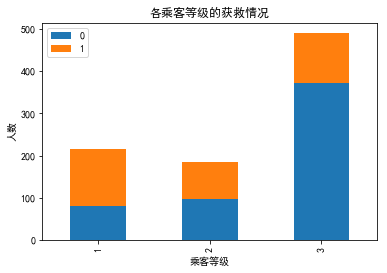

In [8]:
fig = plt.figure(figsize=(15,10))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

#看看各乘客等级的获救情况
Survived_0 = data.Pclass[data.Survived == 0].value_counts()
Survived_1 = data.Pclass[data.Survived == 1].value_counts()
df=pd.DataFrame({u'1':Survived_1, u'0':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 

plt.show()

<font color=red>果然，钱和地位对舱位有影响，进而对获救的可能性也有影响啊 <font><br>
<font color=red>我想说的是，明显等级为1的乘客，获救的概率高很多。这个可以作为一个影响结果的特征<font>

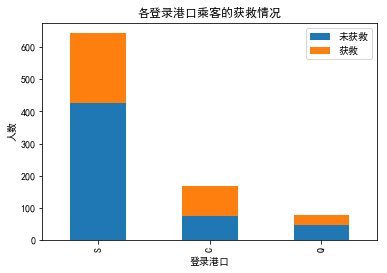

In [9]:
#看看各登录港口的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data.Embarked[data.Survived == 0].value_counts()
Survived_1 = data.Embarked[data.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()

<font color=red>看不出明显的特征<font>

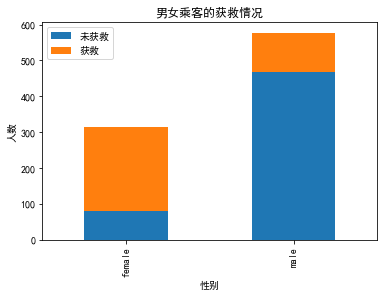

In [10]:
#看看性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data.Sex[data.Survived == 0].value_counts()
Survived_1 = data.Sex[data.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"男女乘客的获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数") 

plt.show()

<font color=red>女性获救的概率比男性大很多，所以，性别也会作为一个特征<font>

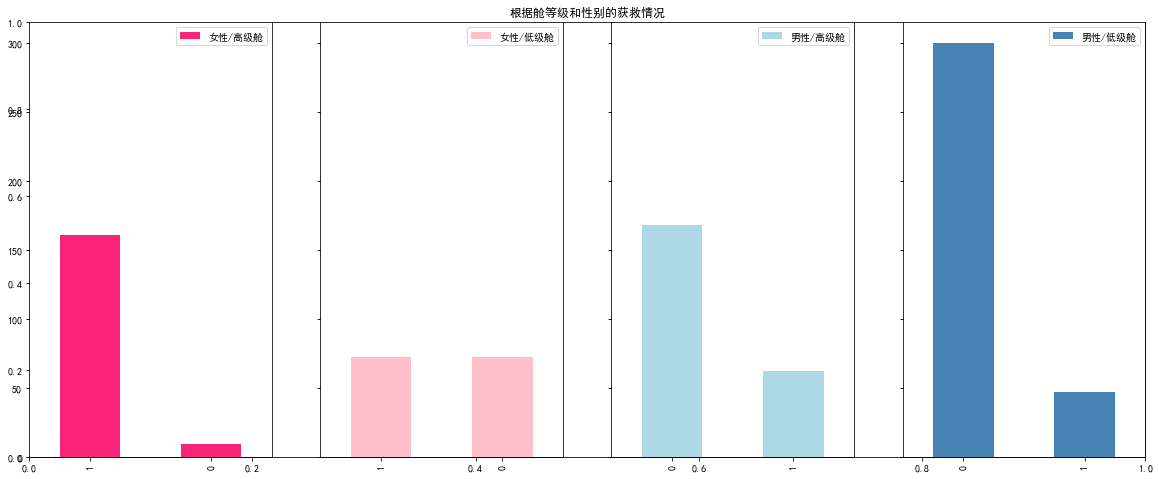

In [11]:
#然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure(figsize=(20,8))
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
data.Survived[data.Sex == 'female'][data.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data.Survived[data.Sex == 'male'][data.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
plt.legend([u"男性/低级舱"], loc='best')

plt.show()


<font color=red>验证了上述说明，仓位越高，活下的概率越大，性别是女性活下的概率也越大。<font><br>
<font color=red>性别和舱位将会作为特征。<font><br>

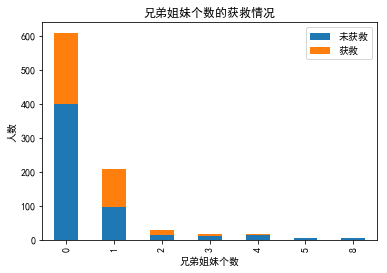

In [12]:
#看看兄弟堂妹个数的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data.SibSp[data.Survived == 0].value_counts()
Survived_1 = data.SibSp[data.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"兄弟姐妹个数的获救情况")
plt.xlabel(u"兄弟姐妹个数") 
plt.ylabel(u"人数") 

plt.show()

<font color=red>没有兄弟姐妹的人占大多数，从图来看，并没有发现什么联系<font><br>


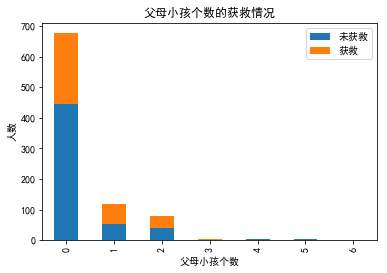

In [13]:
#看看兄弟堂妹个数的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data.Parch[data.Survived == 0].value_counts()
Survived_1 = data.Parch[data.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"父母小孩个数的获救情况")
plt.xlabel(u"父母小孩个数") 
plt.ylabel(u"人数") 

plt.show()

<font color=red>同样的，父母小孩为0的占大多数，但是并没有看出明显的特征<font>

In [14]:
#看看船票
data.Ticket.value_counts()

CA. 2343             7
347082               7
1601                 7
347088               6
CA 2144              6
3101295              6
382652               5
S.O.C. 14879         5
PC 17757             4
4133                 4
LINE                 4
349909               4
347077               4
W./C. 6608           4
113760               4
2666                 4
113781               4
19950                4
17421                4
347742               3
239853               3
110152               3
24160                3
13502                3
PC 17572             3
C.A. 34651           3
248727               3
35273                3
F.C.C. 13529         3
PC 17755             3
                    ..
330877               1
315094               1
236852               1
4137                 1
4136                 1
226593               1
4134                 1
374746               1
110813               1
C.A. 6212            1
349219               1
34218                1
343120     

<font color=red>类别太多，每个类别数量都是一个一个的<font>
<font color=red>没有其他办法，暂且放在一边<font>


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<font color=red>age和Cabin有缺失值，需要对其进行处理<font>
<font color=red>查看一下Cabin的分布情况<font>

In [16]:
data.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

<font color=red>Cabin值的分布太分散，缺失值太多<font>

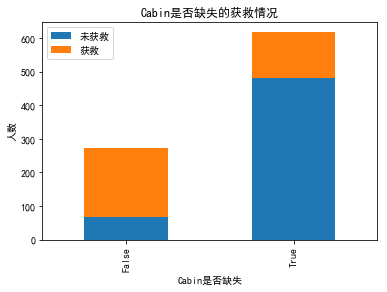

In [17]:
#看看Cabin是否缺失的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_1 = data.Cabin.notnull()[data.Survived==1].value_counts()
Survived_0 = data.Cabin.isnull()[data.Survived==0].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Cabin是否缺失的获救情况")
plt.xlabel(u"Cabin是否缺失") 
plt.ylabel(u"人数") 

plt.show()

<font color=red>Cabin有/无可以作为一个特征<font>

<font color=red>对age，Cabin有缺失值进行处理<font>
<font color=red>通常遇到缺值的情况，我们会有几种常见的处理方式<font><br>

1. <font color=red>如果缺值的样本占总数比例极高，可以直接舍弃<font><br>
2. <font color=red>如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中<font><br>
3. <font color=red>如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step，然后把它离散化，之后把NaN作为一个type加到属性类目中。<font><br>
4. <font color=red>有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上。<font><br>
<font color=red>本例中，后两种处理方式应该都是可行的，我们先试试拟合补全吧(虽然说没有特别多的背景可供我们拟合，这不一定是一个多么好的选择)<font><br>

<font color=red>我们这里用scikit-learn中的RandomForest来拟合一下缺失的年龄数据<font><br>


In [18]:
from sklearn.ensemble import RandomForestRegressor
 
### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data)
data_train = set_Cabin_type(data_train)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.828953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


<font color=red>为了加快模型的收敛，需要对数值型特征进行归一化处理<font><br>


In [19]:
#对数据行age,fare进行归一化处理
#引入特征处理库preprocessing
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(data_train['Age'])
data_train['Age_scaled'] = scaler.fit_transform(data_train['Age'], age_scale_param)
fare_scale_param = scaler.fit(data_train['Fare'])
data_train['Fare_scaled'] = scaler.fit_transform(data_train['Fare'], fare_scale_param)
data_train

D:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_scaled,Fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S,-0.561363,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C,0.613182,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S,-0.267727,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S,0.392955,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S,0.392955,-0.486337
5,6,0,3,"Moran, Mr. James",male,23.828953,0,0,330877,8.4583,No,Q,-0.427102,-0.478116
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S,1.787727,0.395814
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S,-2.029545,-0.224083
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S,-0.194318,-0.424256
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C,-1.148636,-0.042956


<font color=red>对类目型特征进行因子化处理<font><br>

In [20]:
#对Pclass,sex,Cabin,Embarked做因子化处理
dummies_pclass = pd.get_dummies(data_train['Pclass'],prefix='Pclass')

dummies_sex = pd.get_dummies(data_train['Sex'],prefix='Sex')

dummies_Cabin = pd.get_dummies(data_train['Cabin'],prefix='Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'],prefix='Embarked')

data = pd.concat([data,dummies_pclass,dummies_sex,dummies_Cabin,dummies_Embarked],axis=1)
data.drop(['Age','Fare','Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,SibSp,Parch,Age_scaled,Fare_scaled,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,0,-0.561363,-0.502445,0,0,1,0,1,1,0,0,0,1
1,2,1,1,0,0.613182,0.786845,1,0,0,1,0,0,1,1,0,0
2,3,1,0,0,-0.267727,-0.488854,0,0,1,1,0,1,0,0,0,1
3,4,1,1,0,0.392955,0.420730,1,0,0,1,0,0,1,0,0,1
4,5,0,0,0,0.392955,-0.486337,0,0,1,0,1,1,0,0,0,1


<font color=red>选择特征，转成numpy格式，使用scikit-learn中的LogisticRegression建模。<font>

In [21]:
from sklearn import linear_model

train_df = data.filter(regex='Survived|SibSp|Parch|Age_scaled|Fare_scaled|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()


train_y = train_np[:, 0]

# X即特征属性值
train_x = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_x, train_y)
    
clf


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

<font color=red>对测试集数据进行同样的处理<font>

In [22]:
data_test = pd.read_csv("test.csv")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [23]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
data_test = pd.read_csv("test.csv")
#处理缺失值fare,age,Cabin
data_test.loc[(data_test.Fare.isnull()),'Fare'] = 0

df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']] #取出数值型特征
age_null = df[df.Age.isnull()].as_matrix()
test_X =age_null[:,1:]
predict_age = rfr.predict(test_X)

data_test.loc[(data_test.Age.isnull()),'Age'] = predict_age

data_test = set_Cabin_type(data_test) 
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,No,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,No,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,No,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,No,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,No,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,No,S
6,898,3,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,No,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,No,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,No,C
9,901,3,"Davies, Mr. John Samuel",male,21.000000,2,0,A/4 48871,24.1500,No,S


In [25]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


缺失值已经补齐，同样的对测试集做归一化和因子化处理

In [26]:
Pclass_dummies =  pd.get_dummies(data_test['Pclass'],prefix='Pclass')
Sex_dummies =  pd.get_dummies(data_test['Sex'],prefix='Sex')
Cabin_dummies =  pd.get_dummies(data_test['Cabin'],prefix='Cabin')
Embarked_dummies =  pd.get_dummies(data_test['Embarked'],prefix='Embarked')

age_scale_param = scaler.fit(data_test['Age'])
data_test['Age_scaled'] = scaler.fit_transform(data_test['Age'], age_scale_param)
fare_scale_param = scaler.fit(data_test['Fare'])
data_test['Fare_scaled'] = scaler.fit_transform(data_test['Fare'], fare_scale_param)

data_test = pd.concat([data_test,Pclass_dummies,Sex_dummies,Cabin_dummies,Embarked_dummies],axis=1)
data_test.head(10)

D:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,No,...,0,0,1,0,1,1,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,No,...,0,0,1,1,0,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,No,...,0,1,0,0,1,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,No,...,0,0,1,0,1,1,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,No,...,0,0,1,1,0,1,0,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,No,...,0,0,1,0,1,1,0,0,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,No,...,0,0,1,1,0,1,0,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,No,...,0,1,0,0,1,1,0,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,No,...,0,0,1,1,0,1,0,1,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,No,...,0,0,1,0,1,1,0,0,0,1


In [27]:
test = data_test.filter(regex='SibSp|Parch|Cabin_.*|Pclass_.*|Sex_.*|Embarked_.*|Age_scaled|Fare_scaled')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv('lr_prediction.csv',index=False)

<font color=red>成绩为0.76555<font>

<font color=red>接下来，打算SVM这个模型<font>

In [28]:
from sklearn import svm
svc = svm.SVC(kernel='rbf', gamma=1e2)
svc.fit(train_x,train_y)

predictions_svm = svc.predict(test)
result_svm = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions_svm.astype(np.int32)})
result_svm.to_csv('svm_prediction.csv',index=False)


<font color=red>成绩为0.61244<font>

<font color=red>因此选择LogisticRegression作为baseline<font>
<font color=red>对模型进行分析，是否过拟合<font>
<font color=red>现在我们对训练数据进行划分并且画出训练集和测试集的预测图像<font>


In [29]:
#引入learning_curve
from sklearn.learning_curve import learning_curve

D:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda2\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [30]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(0.05, 1, 20), verbose=0, plot=True):
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    fig=plt.figure(figsize=(15,7))
    plt.title(title)
    plt.xlabel(u"训练样本数")
    plt.ylabel(u"得分")
    
    plt.grid()
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")

    plt.legend(loc="best")
    plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

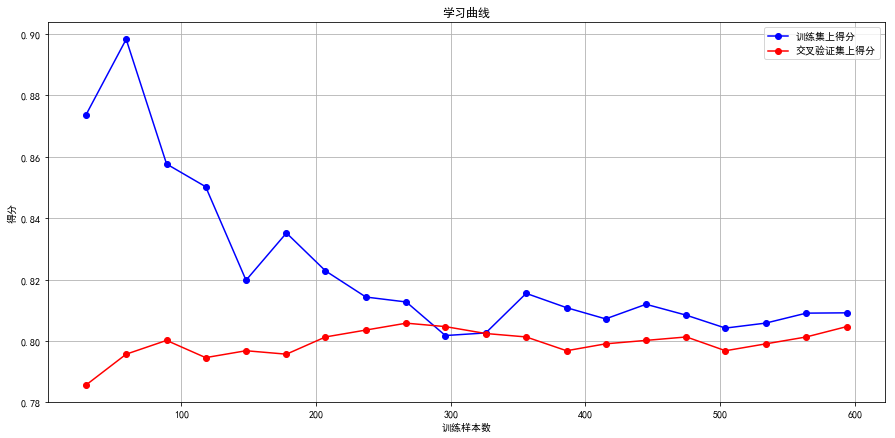

(0.80656968448540245, 0.018258876711338634)

In [31]:
plot_learning_curve(clf, u"学习曲线", train_x, train_y)

<font color=red>从图来看模型并没有过拟合<font>
<font color=red>我们再来看看模型系数和特征的相关度<font>


In [32]:
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)})

,coef,columns
0,[-0.344228601212],SibSp
1,[-0.104931276497],Parch
2,[-0.523782171831],Age_scaled
3,[0.0844325132879],Fare_scaled
4,[0.341143852626],Pclass_1
5,[0.0],Pclass_2
6,[-1.19413998714],Pclass_3
7,[1.95657584205],Sex_female
8,[-0.67742053202],Sex_male
9,[0.0],Cabin_No


<font color=red>相关度较高的特征为Pclass_3，Sex_female，Sex_male<font>


<font color=red>交叉验证<font>
<font color=red>交叉验证<font>
<font color=red>交叉验证<font>

In [35]:
from sklearn import cross_validation


# 简单看看打分情况
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = data.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.as_matrix()[:,1:]
y = all_data.as_matrix()[:,0]
print cross_validation.cross_val_score(clf, X, y, cv=5)

[ 0.81564246  0.81564246  0.78651685  0.78651685  0.81355932]


In [40]:
# 分割数据
split_train, split_cv = cross_validation.train_test_split(data, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# 生成模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])



# 对cross validation数据进行预测
cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.as_matrix()[:,1:])

In [41]:
# 去除预测错误的case看原始dataframe数据
#split_cv['PredictResult'] = predictions
origin_data_train = pd.read_csv("Train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]
bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.00,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.00,0,0,A/5 3540,8.0500,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


对比bad case，我们仔细看看我们预测错的样本，到底是哪些特征有问题，咱们处理得还不够细？<br>

我们随便列一些可能可以做的优化操作：<br>

* Age属性不使用现在的拟合方式，而是根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。
* Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature。
* Cabin再细化一些，对于有记录的Cabin属性，我们将其分为前面的字母部分(我猜是位置和船层之类的信息) 和 后面的数字部分(应该是房间号，有意思的事情是，如果你仔细看看原始数据，你会发现，这个值大的情况下，似乎获救的可能性高一些)。
* Pclass和Sex俩太重要了，我们试着用它们去组出一个组合属性来试试，这也是另外一种程度的细化。
* 单加一个Child字段，Age<=12的，设为1，其余为0(你去看看数据，确实小盆友优先程度很高啊)
* 如果名字里面有『Mrs』，而Parch>1的，我们猜测她可能是一个母亲，应该获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0
* 登船港口可以考虑先去掉试试(Q和C本来就没权重，S有点诡异)
* 把堂兄弟/兄妹 和 Parch 还有自己 个数加在一起组一个Family_size字段(考虑到大家族可能对最后的结果有影响)
* Name是一个我们一直没有触碰的属性，我们可以做一些简单的处理，比如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样。
